In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 24})

In [2]:
cost = pd.read_csv('costs.csv')
train_cost, valid_cost = cost['train_cost'], cost['valid_cost']

(2.0, 12.0)

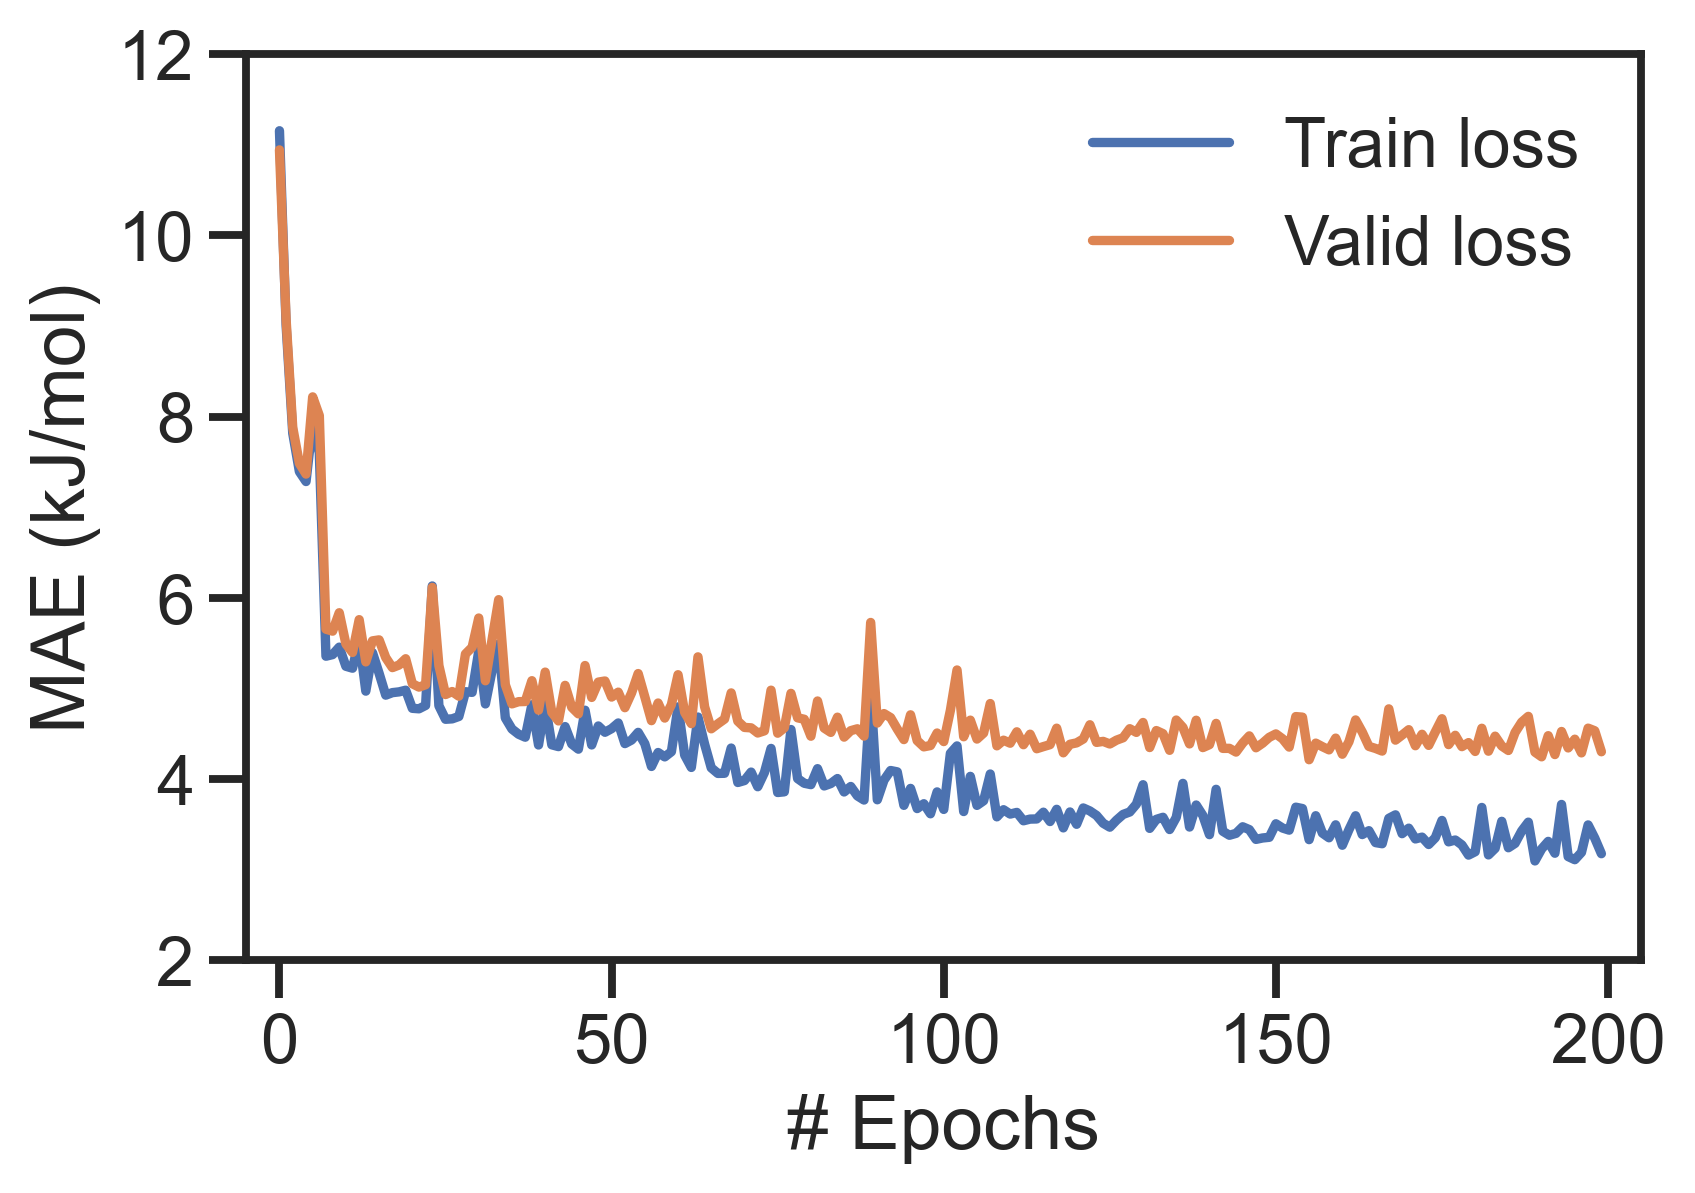

In [3]:
import numpy as np
plt.plot(train_cost, label='Train loss')
plt.plot(valid_cost, label='Valid loss')
plt.xlabel('# Epochs')
plt.ylabel('MAE (kJ/mol)')
plt.legend()
plt.xlim([-5.0, 205.0])
plt.ylim([2.0, 12.0])
#plt.xticks(np.arange(-5.0,5.01,))

(0.0, 7.0)

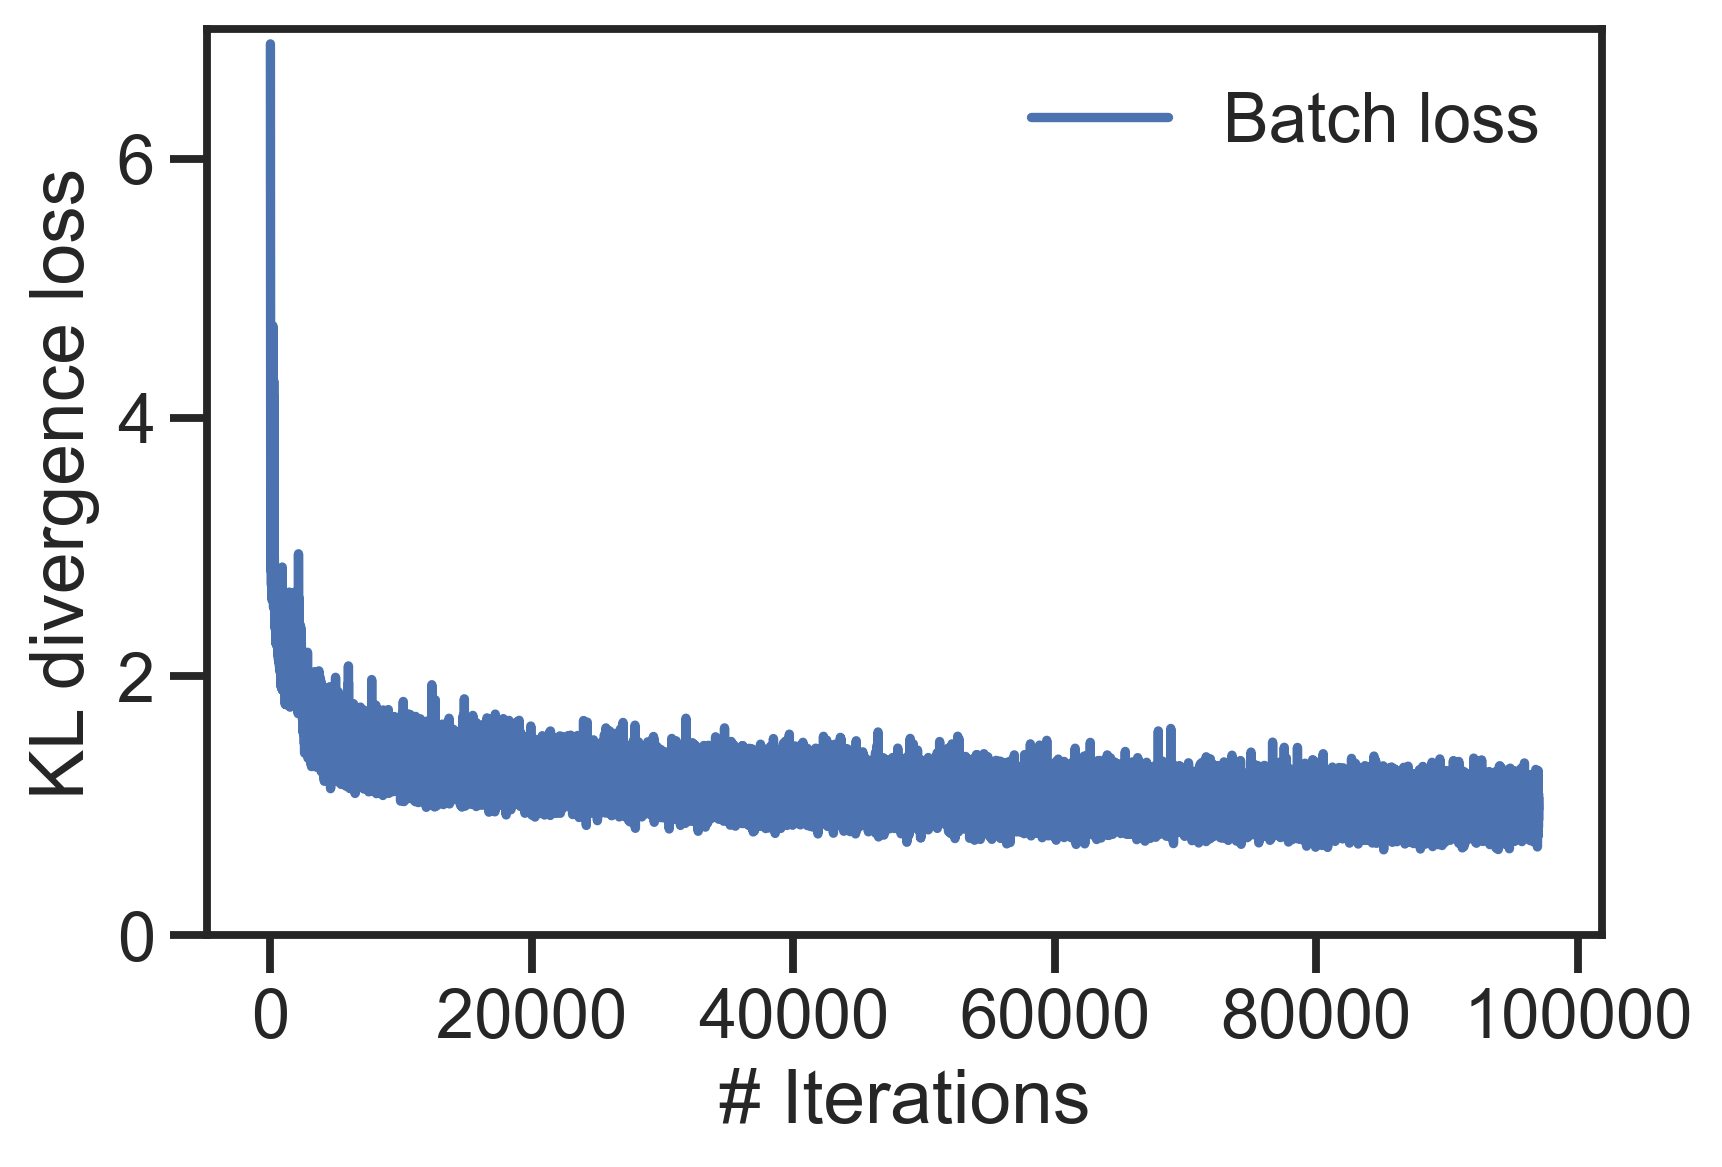

In [4]:
cost = pd.read_csv('batch_costs.csv')
batch_cost = cost['batch_cost']
plt.plot(batch_cost, label='Batch loss')
plt.xlabel('# Iterations')
plt.ylabel('KL divergence loss')
plt.legend()
plt.ylim([0,7])

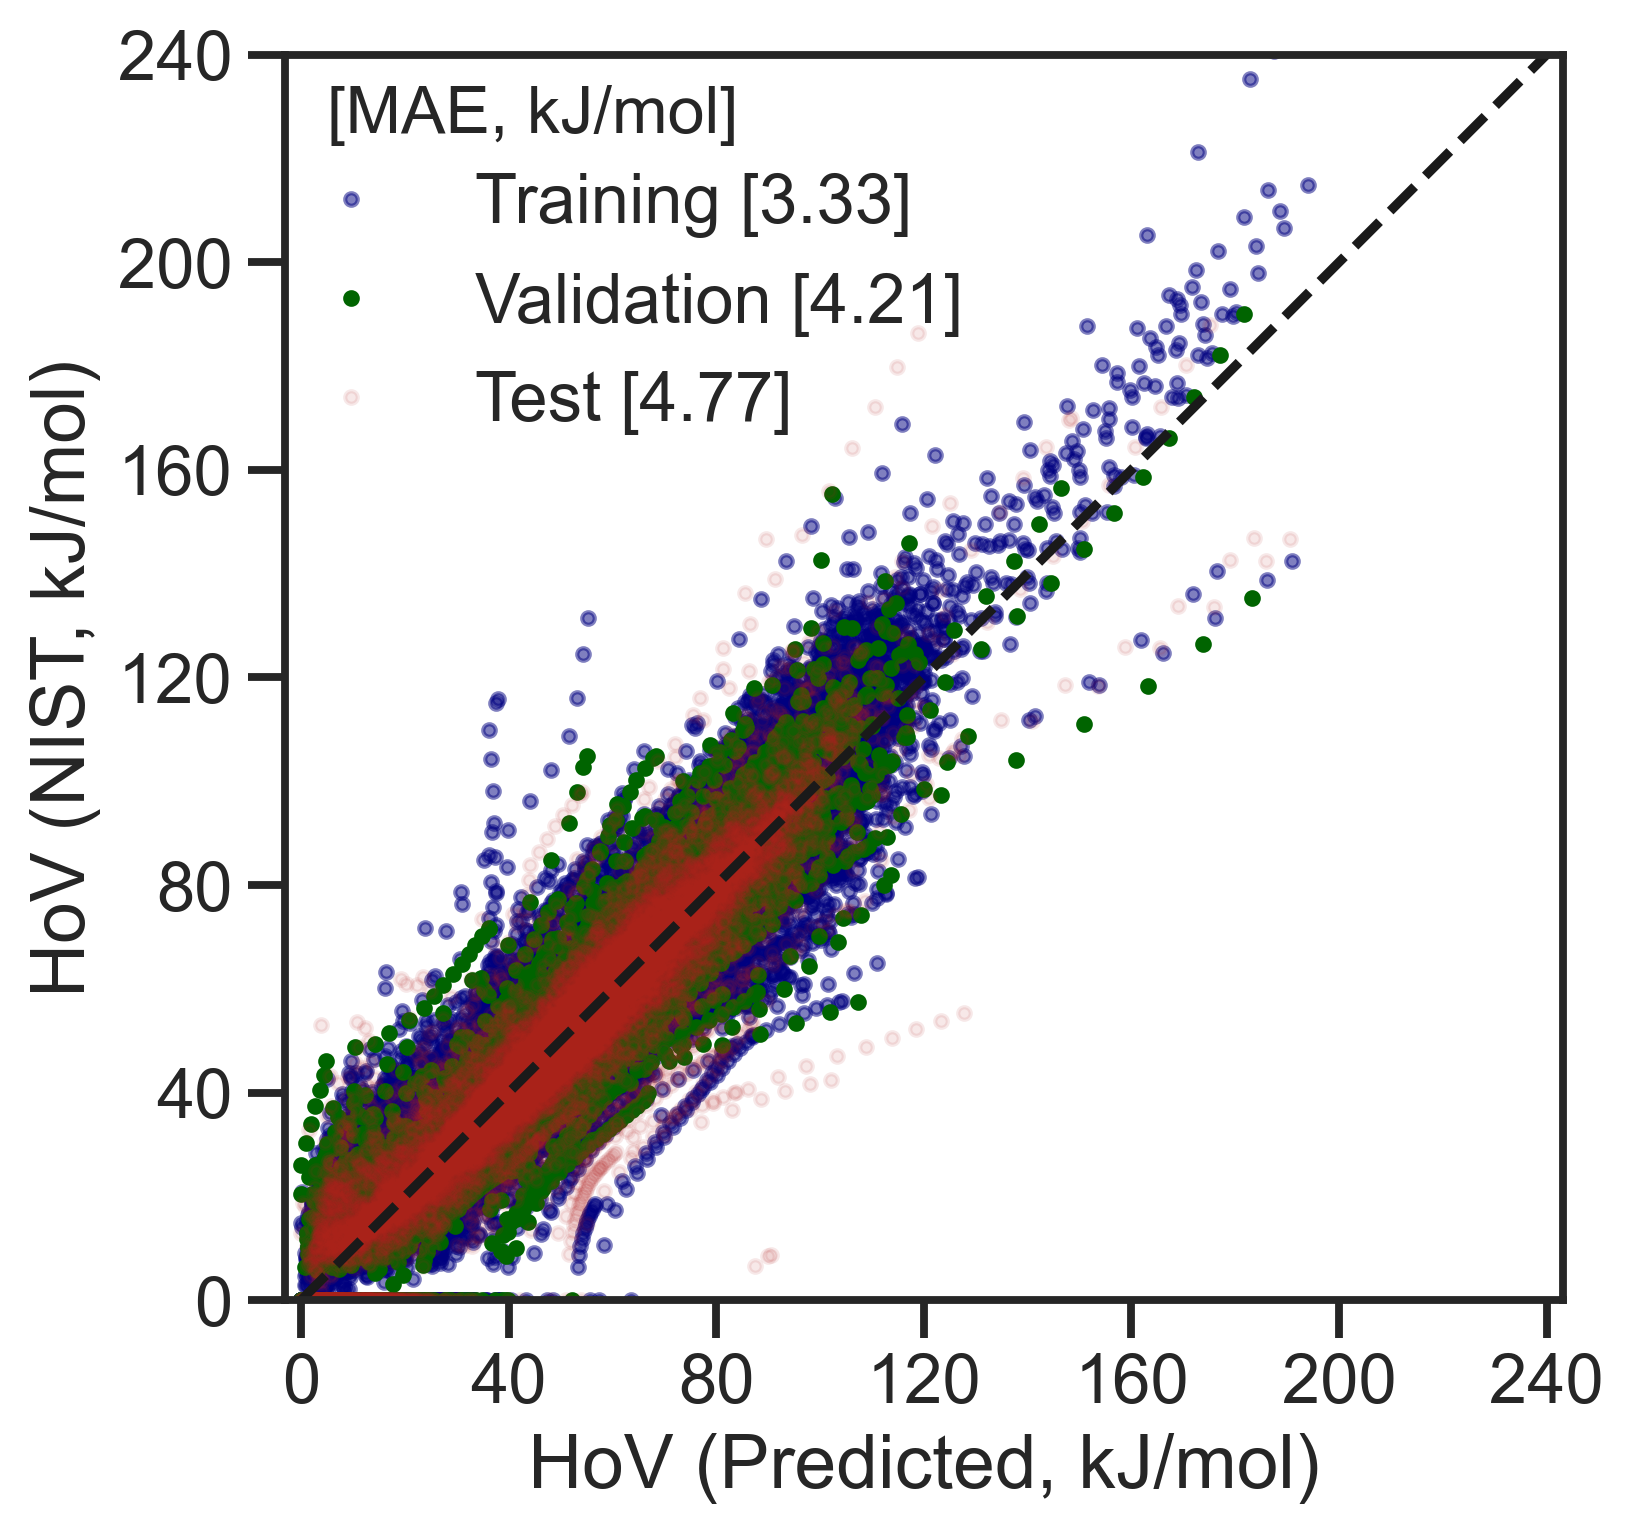

In [5]:
import numpy as np

hov_result = pd.read_csv('HoV_results.csv')

train_x = hov_result[hov_result['Train/Valid/Test'] == 'Train']['Predicted']
train_y = hov_result[hov_result['Train/Valid/Test'] == 'Train']['NIST']
valid_x = hov_result[hov_result['Train/Valid/Test'] == 'Valid']['Predicted']
valid_y = hov_result[hov_result['Train/Valid/Test'] == 'Valid']['NIST']
test_x = hov_result[hov_result['Train/Valid/Test'] == 'Test']['Predicted']
test_y = hov_result[hov_result['Train/Valid/Test'] == 'Test']['NIST']

fig = plt.figure(figsize=(5.5,5.5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xticks(np.arange(0.0,240.01,40.0))
ax.set_yticks(np.arange(0.0,240.01,40.0))
ax.set_xlim([0,240])
ax.set_ylim([0,240])
ax.set_xlabel('HoV (Predicted, kJ/mol)')
ax.set_ylabel('HoV (NIST, kJ/mol)')
plt.text(5,225,'[MAE, kJ/mol]', fontdict={"size":16})

#ax.plot(train_x, train_y, '.', ms=15, label='Training [3.33]', color='navy')
#ax.plot(valid_x, valid_y, '.',  ms=15, label='Validation [4.21]', color='darkgreen')
#ax.plot(test_x, test_y, '.',  ms=15, label='Test [4.77]', color='firebrick')

ax.plot(train_x, train_y, '.', ms=6, label='Training [3.33]', alpha=0.5, color='navy')
ax.plot(valid_x, valid_y, '.',  ms=6, label='Validation [4.21]', alpha=1.0, color='darkgreen')
ax.plot(test_x, test_y, '.',  ms=6, label='Test [4.77]', alpha=0.1, color='firebrick')
lgnd = ax.legend(loc='center left', bbox_to_anchor=(-0.05, .8))
    
ax.plot([0,240], [0, 240], '--', color='.1')

#fig.savefig('fig.pdf')

0 COC(=O)C(C)O
1 COC(=O)CCO
2 CCCC(O)CC(=O)OCC
3 CCCCCC(=O)OCC


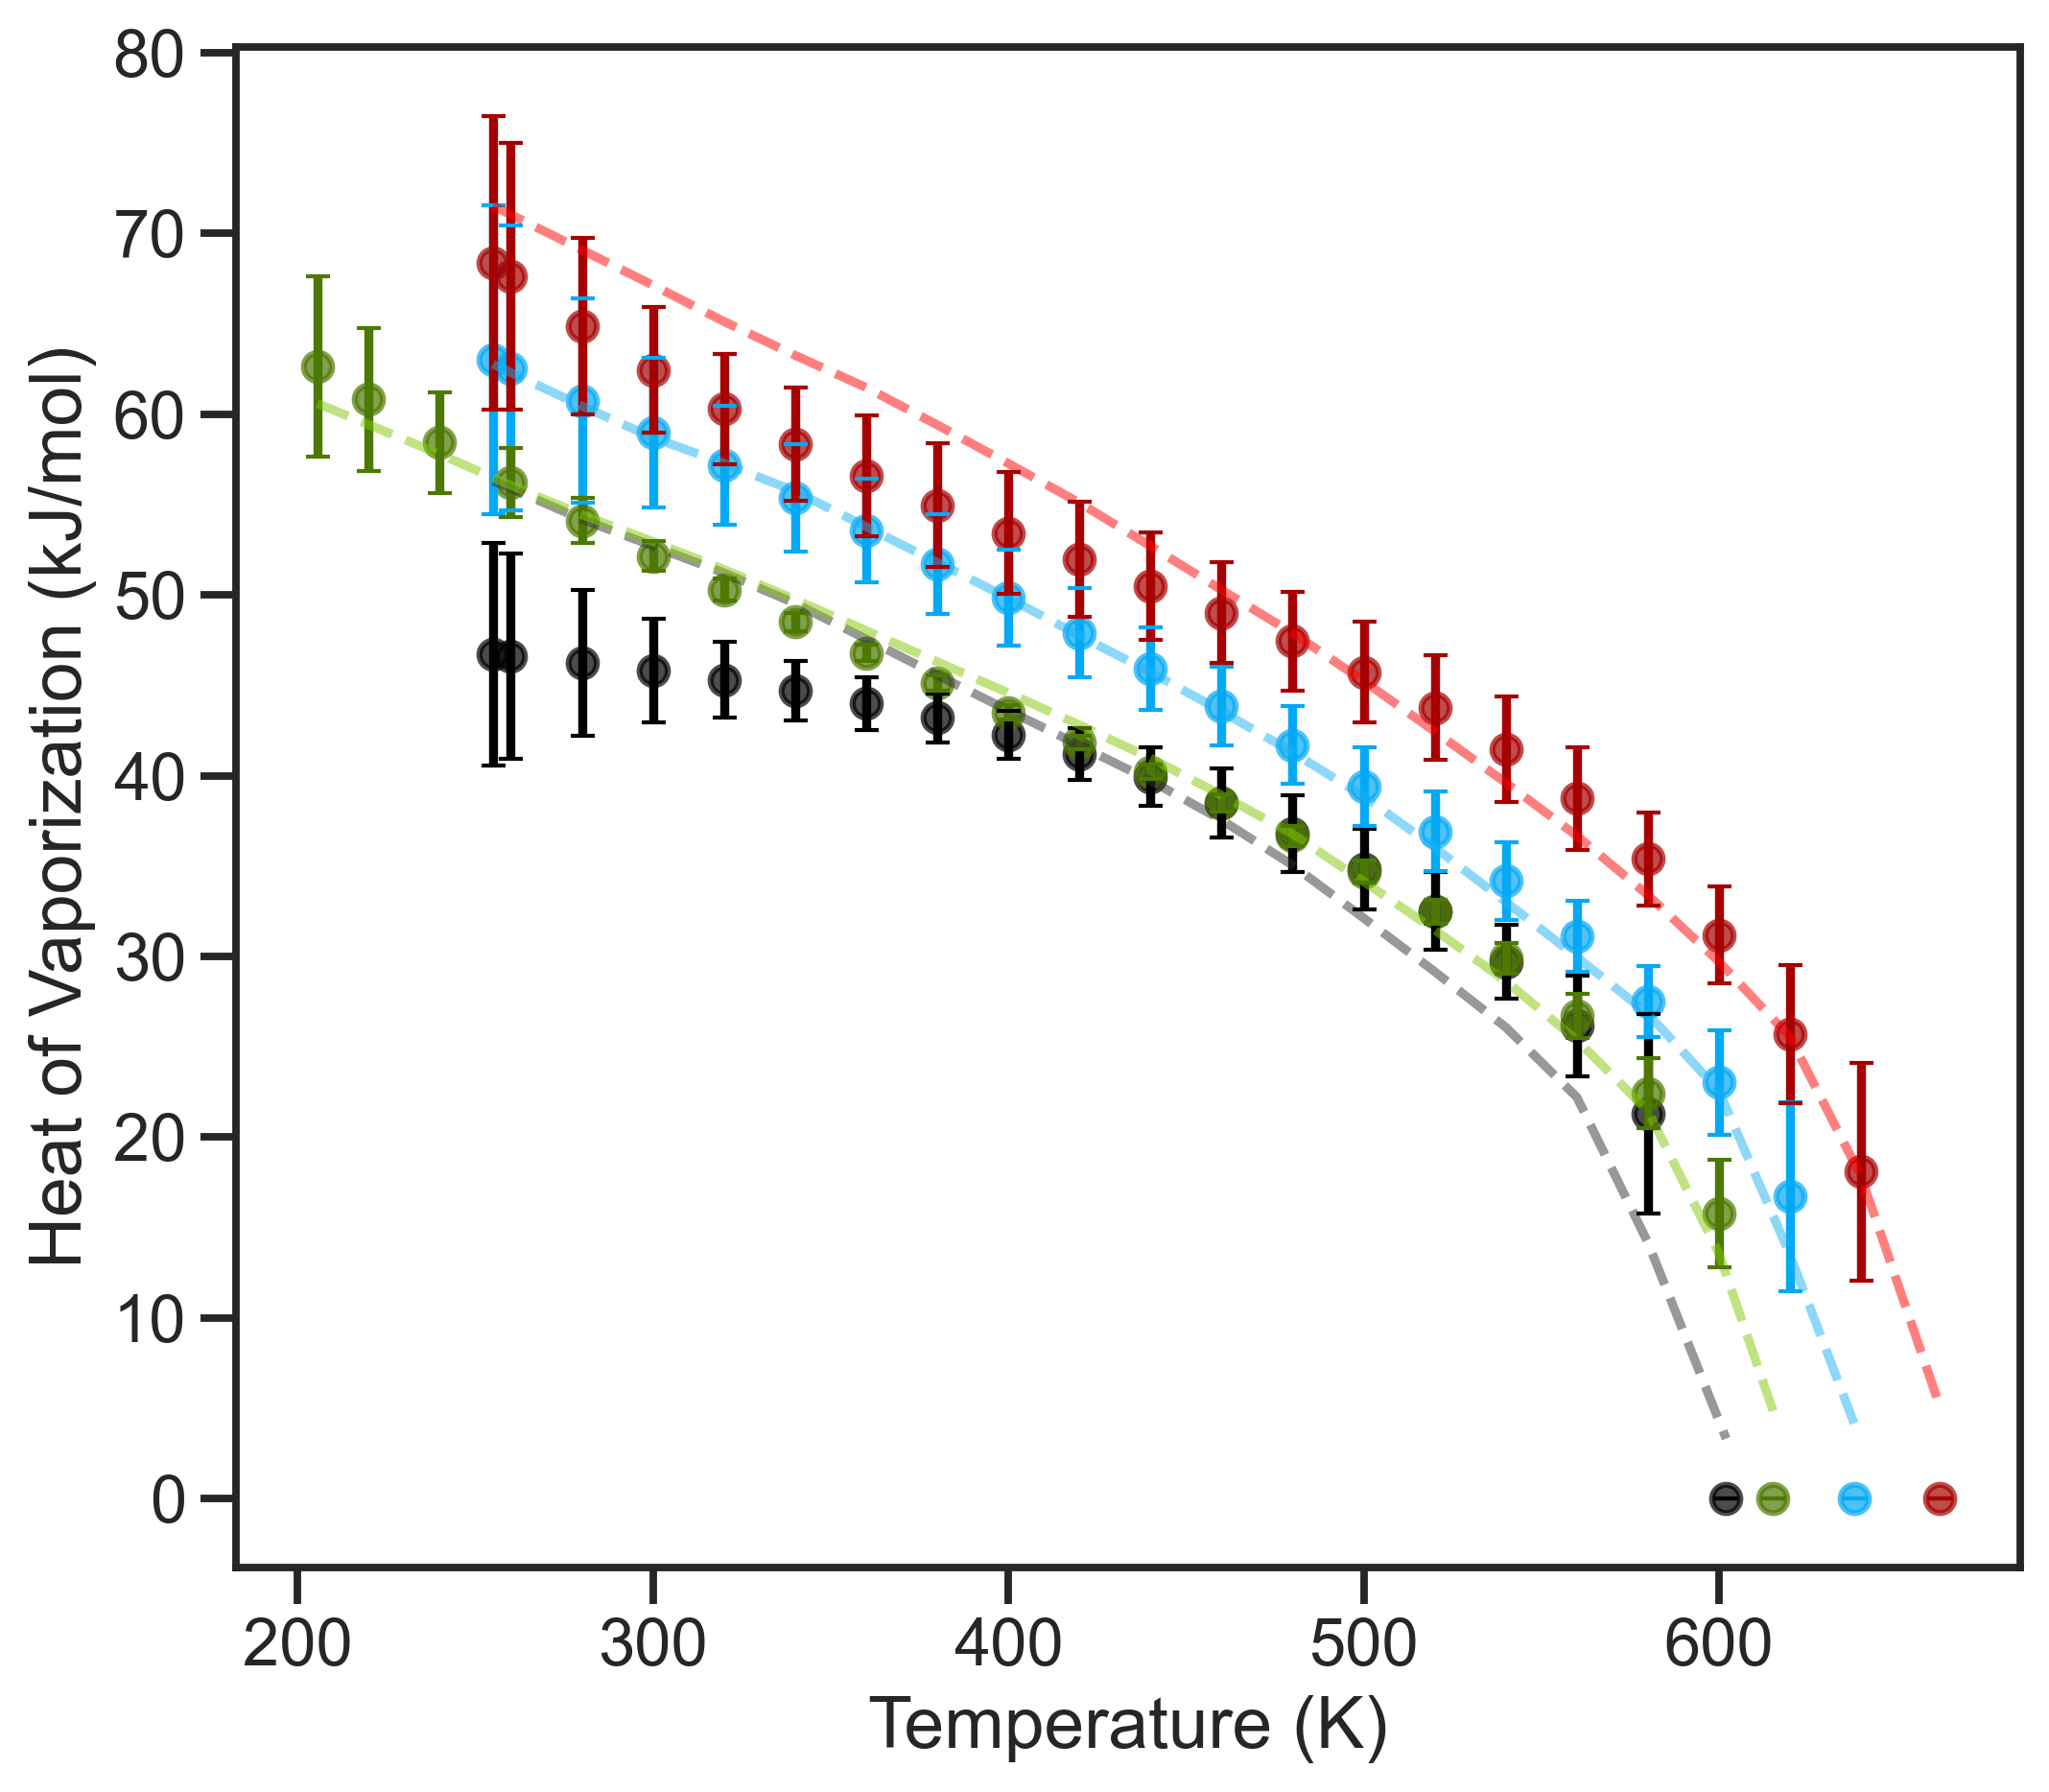

In [6]:
import matplotlib

#mol_list=['CCCCOCCCC', 'CCCCOCC(C)C', 'CC(C)COCC(C)C']


mol_list = ['COC(=O)C(C)O', 'COC(=O)CCO', 'CCCC(O)CC(=O)OCC', 'CCCCCC(=O)OCC']



#mol_of_interest = hov_result[hov_result.smiles.isin(mol_list)]
#mol_of_interest

fig,ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(8)
#ax.set_xlim([245,850])
#ax.set_ylim([0,105])
#ax.set_xticks(np.arange(250,851,150))
#ax.set_yticks(np.arange(20,101,20))
matplotlib.rcParams.update({'errorbar.capsize': 3})
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 20})

colors = ['#333333', 'black', '#1CB2F5', '#03A9F4', '#ff0000','#a70000',\
          '#80c904','#4d7902', '#ff00ff', '#e600e6']

for i, smi in enumerate(mol_list):
    print(i,smi)
    mol_of_interest = hov_result[hov_result.smiles==smi].sort_values(by=['temperature'])

    t, hov = mol_of_interest['temperature'], mol_of_interest['Predicted']
    #plt.scatter(t,hov, marker='s', color=colors[2*i])
    #alpha  was 0.5
    plt.plot(t,hov,  color=colors[2*i], linestyle='--', alpha=0.5, label ='Predicted')
    #plt.errorbar(t, hov, yerr= mol_of_interest['ML_unc'], color= colors[2*i])

    t, hov = mol_of_interest['temperature'], mol_of_interest['NIST']
    #alpha was 0.7
    plt.scatter(t,hov, color = colors[2*i+1], s=50, alpha=0.7, label ='NIST')
    plt.errorbar(t, hov, yerr= mol_of_interest['DB_unc'], ls='none', color= colors[2*i+1])
    #plt.plot(t,hov, color = colors[i])

    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat of Vaporization (kJ/mol)')
    
    #plt.legend(frameon=True)
    
    #if i == 0: break

Spearman
0.6349462482948897
0.6134455971641998
0.6089511847746245
Pearson
0.6031280671194398
0.5690012116061632
0.5868755134062114


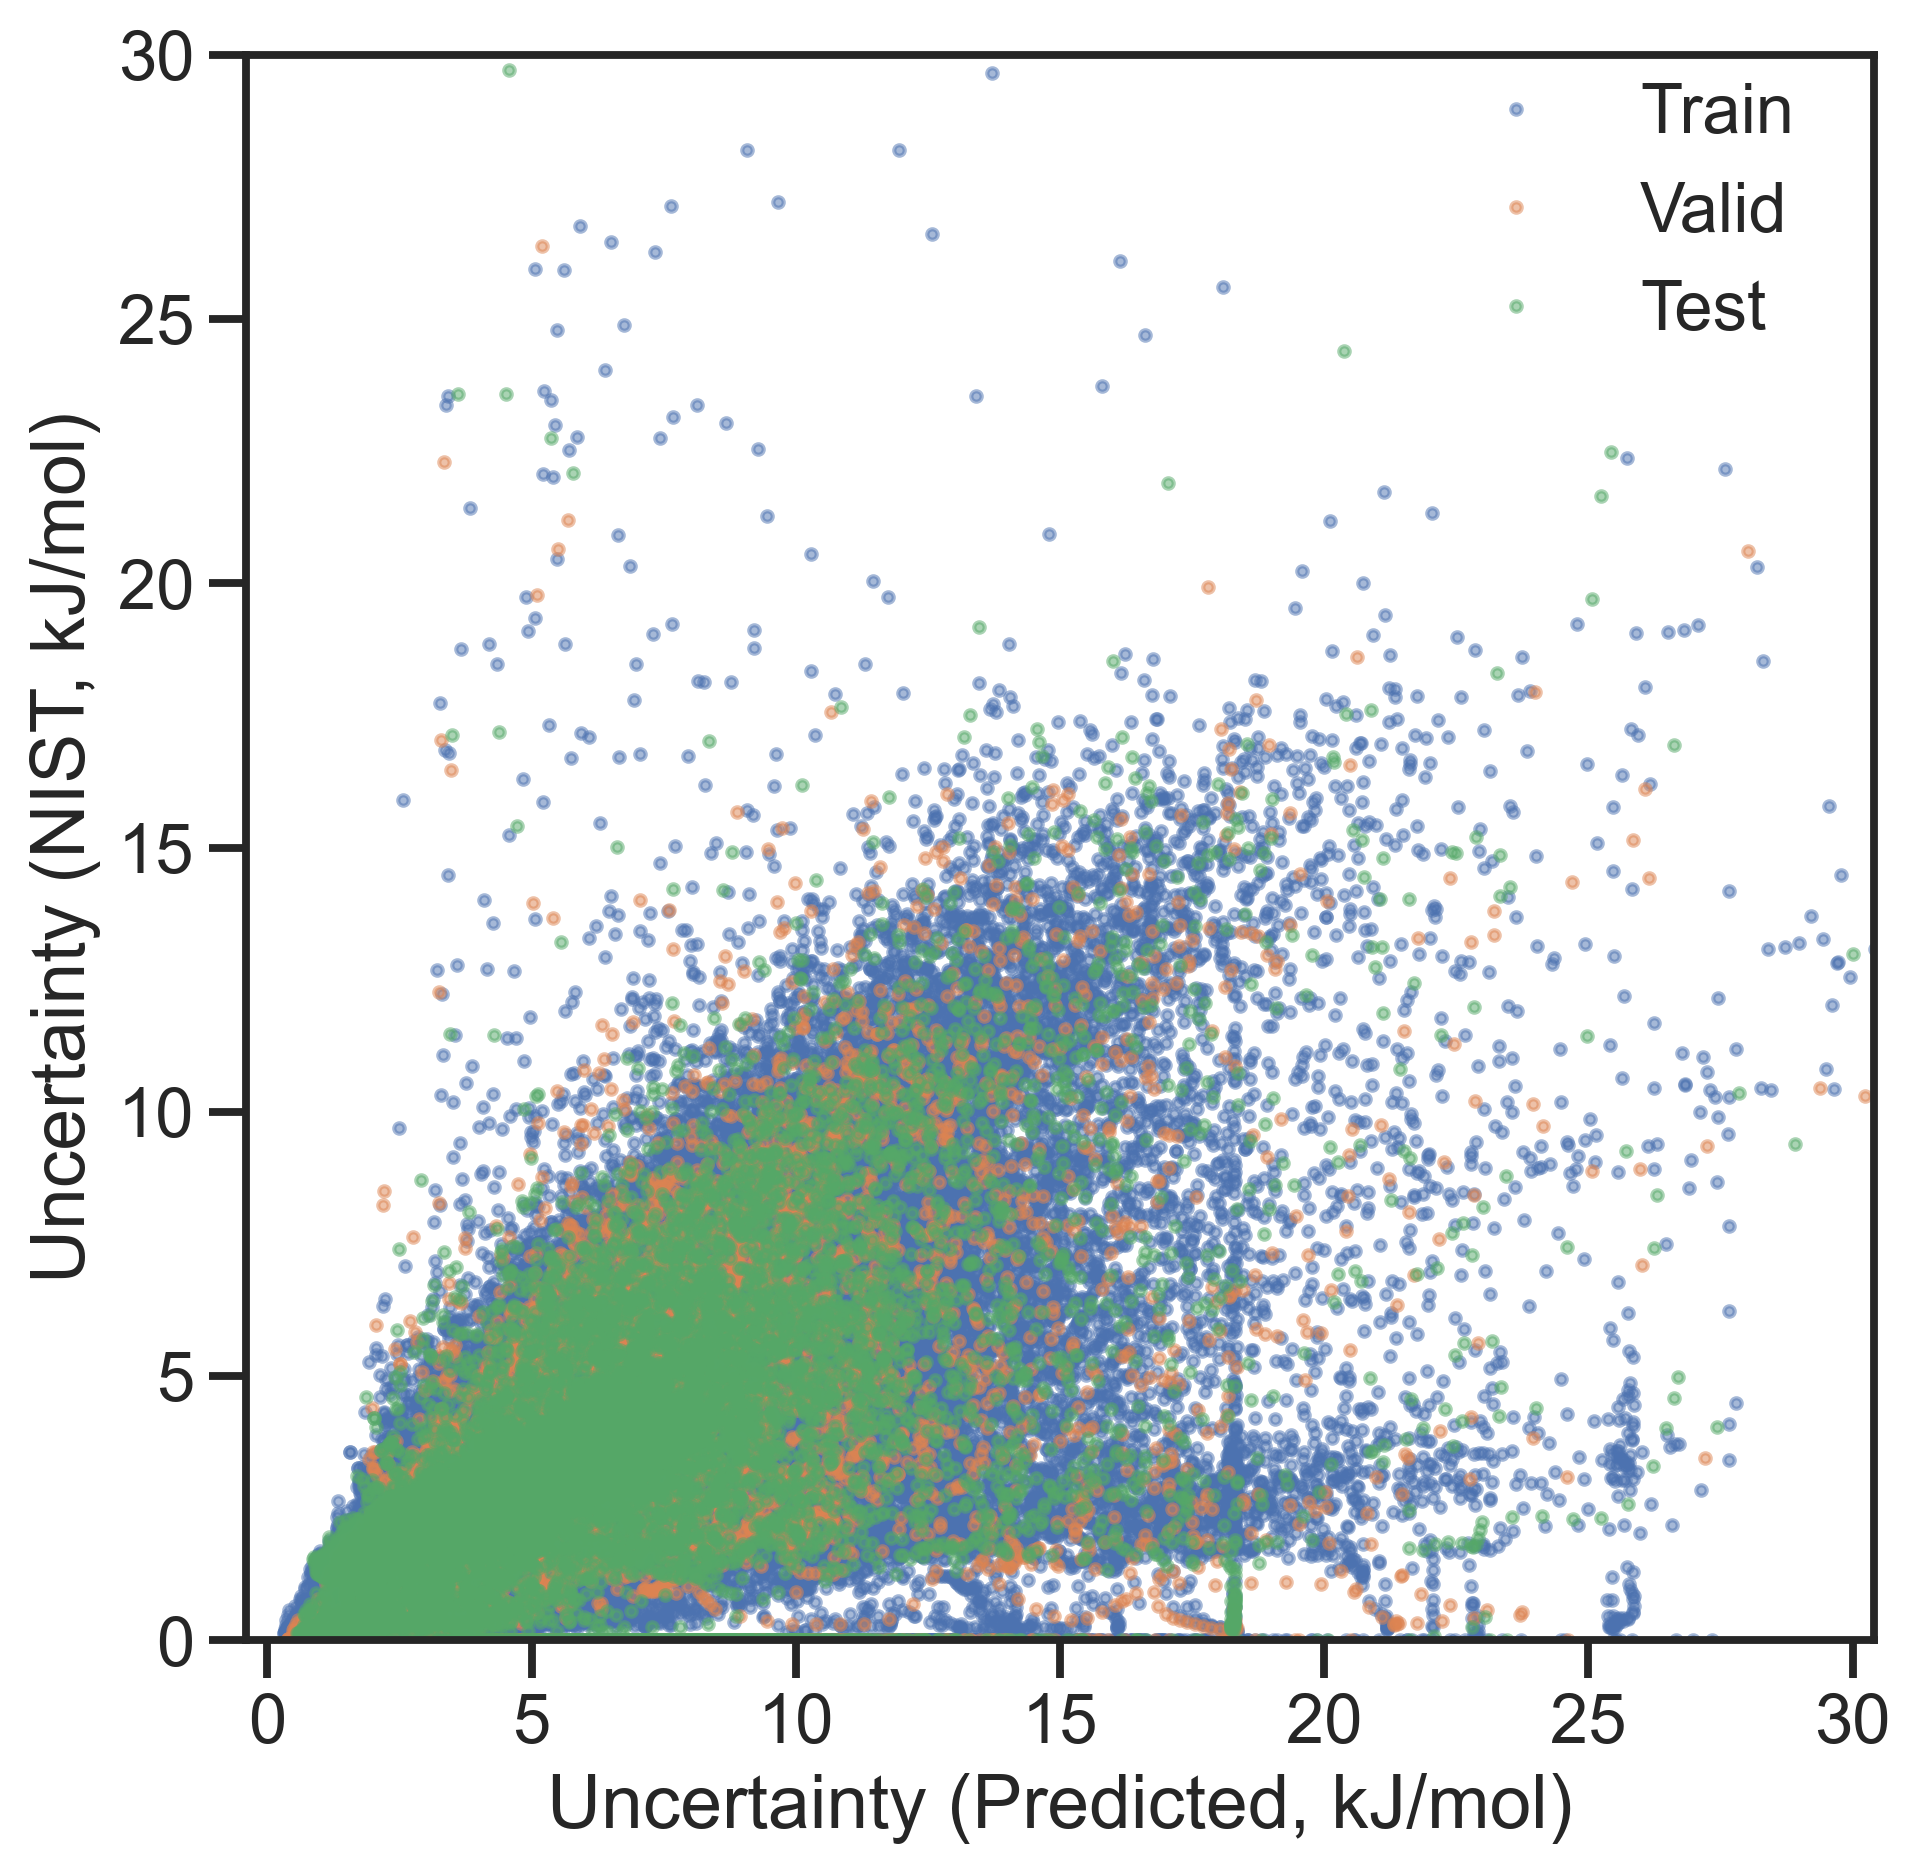

In [7]:
## uncertainty - Pearson vs. Spearman correlation coef

train_ml_unc = hov_result[hov_result['Train/Valid/Test'] == 'Train']['ML_unc']
train_db_unc = hov_result[hov_result['Train/Valid/Test'] == 'Train']['DB_unc']
valid_ml_unc = hov_result[hov_result['Train/Valid/Test'] == 'Valid']['ML_unc']
valid_db_unc = hov_result[hov_result['Train/Valid/Test'] == 'Valid']['DB_unc']
test_ml_unc = hov_result[hov_result['Train/Valid/Test'] == 'Test']['ML_unc']
test_db_unc = hov_result[hov_result['Train/Valid/Test'] == 'Test']['DB_unc']

from scipy import stats
print('Spearman')
print(stats.spearmanr(train_ml_unc, train_db_unc).correlation)
print(stats.spearmanr(valid_ml_unc, valid_db_unc).correlation)
print(stats.spearmanr(test_ml_unc, test_db_unc).correlation)


print('Pearson')
print(np.corrcoef(train_ml_unc, train_db_unc)[0][1])
print(np.corrcoef(valid_ml_unc, valid_db_unc)[0][1])
print(np.corrcoef(test_ml_unc, test_db_unc)[0][1])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xticks(np.arange(0.0,30.01,5.0))
ax.set_yticks(np.arange(0.0,30.01,5.0))
ax.set_xlim([0,30])
ax.set_ylim([0,30])
ax.set_xlabel('Uncertainty (Predicted, kJ/mol)')
ax.set_ylabel('Uncertainty (NIST, kJ/mol)')
ax.plot(train_ml_unc, train_db_unc, '.', ms=5, label='Train', alpha=0.5)
ax.plot(valid_ml_unc, valid_db_unc, '.',  ms=5, label='Valid', alpha=0.5)
ax.plot(test_ml_unc, test_db_unc, '.',  ms=5, label='Test', alpha=0.5)
ax.legend(loc='center left', bbox_to_anchor=(.7, .9))
#ax.plot([0,240], [0, 240], '--', color='.7')


Spearman
0.5712391845865842
0.47431575571820606
0.4960050911328227
--------------------------
0.268955467346908
0.21055041526028814
0.20374097608561176
78.06824


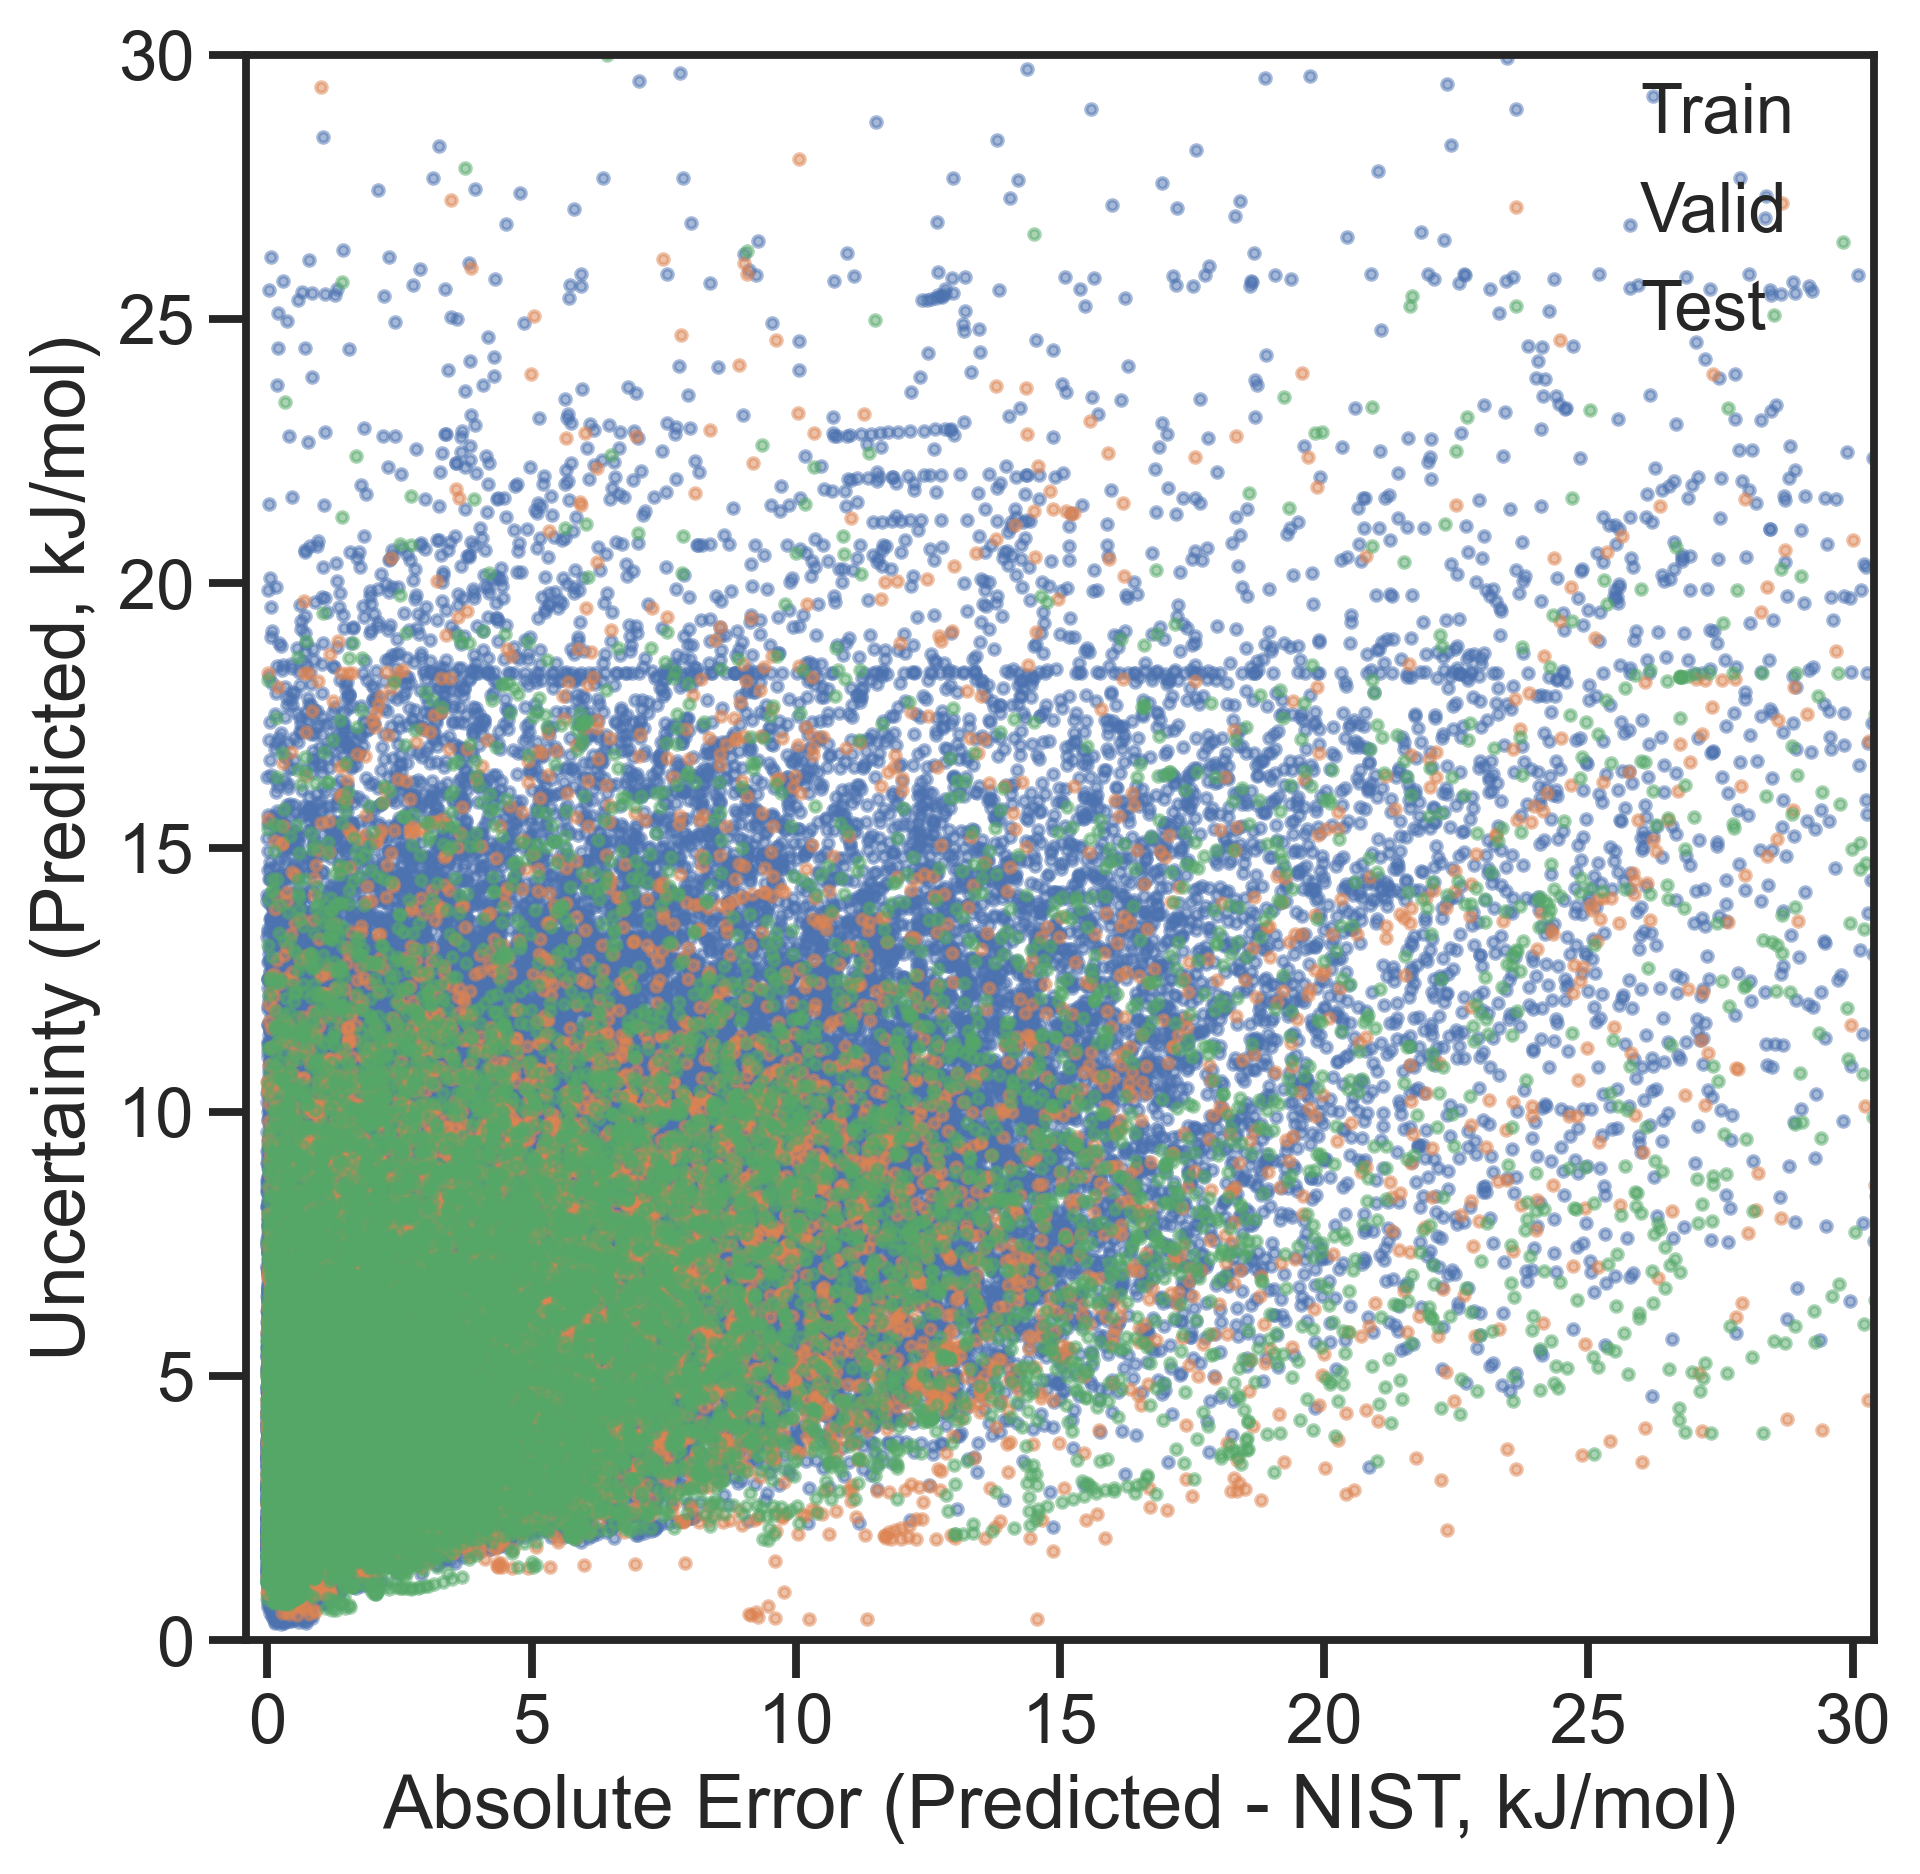

In [8]:
## corr analysis - prediction error vs. exp uncertainty

hov_result['pred-NIST'] = hov_result['Predicted'] - hov_result['NIST']
hov_result['AE'] = np.abs(hov_result['pred-NIST'])

train_ml_err = hov_result[hov_result['Train/Valid/Test'] == 'Train']['AE']
train_ml_unc = hov_result[hov_result['Train/Valid/Test'] == 'Train']['ML_unc']
valid_ml_err = hov_result[hov_result['Train/Valid/Test'] == 'Valid']['AE']
valid_ml_unc = hov_result[hov_result['Train/Valid/Test'] == 'Valid']['ML_unc']
test_ml_err = hov_result[hov_result['Train/Valid/Test'] == 'Test']['AE']
test_ml_unc = hov_result[hov_result['Train/Valid/Test'] == 'Test']['ML_unc']

train_db_unc = hov_result[hov_result['Train/Valid/Test'] == 'Train']['DB_unc']
valid_db_unc = hov_result[hov_result['Train/Valid/Test'] == 'Valid']['DB_unc']
test_db_unc = hov_result[hov_result['Train/Valid/Test'] == 'Test']['DB_unc']

from scipy import stats
print('Spearman')
print(stats.spearmanr(train_ml_err, train_ml_unc).correlation)
print(stats.spearmanr(valid_ml_err, valid_ml_unc).correlation)
print(stats.spearmanr(test_ml_err, test_ml_unc).correlation)
print('--------------------------')
print(stats.spearmanr(train_ml_err, train_db_unc).correlation)
print(stats.spearmanr(valid_ml_err, valid_db_unc).correlation)
print(stats.spearmanr(test_ml_err, test_db_unc).correlation)


#print('Pearson')
#print(np.corrcoef(train_ml_err, train_ml_unc)[0][1])
#print(np.corrcoef(valid_ml_err, valid_ml_unc)[0][1])
#print(np.corrcoef(test_ml_err, test_ml_unc)[0][1])





fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xticks(np.arange(0.0,30.01,5.0))
ax.set_yticks(np.arange(0.0,30.01,5.0))
ax.set_xlim([0,30])
ax.set_ylim([0,30])
ax.set_xlabel('Absolute Error (Predicted - NIST, kJ/mol)')
ax.set_ylabel('Uncertainty (Predicted, kJ/mol)')
ax.plot(train_ml_err, train_ml_unc, '.', ms=5, label='Train', alpha=0.5)
ax.plot(valid_ml_err, valid_ml_unc, '.',  ms=5, label='Valid', alpha=0.5)
ax.plot(test_ml_err, test_ml_unc, '.',  ms=5, label='Test', alpha=0.5)
ax.legend(loc='center left', bbox_to_anchor=(.7, .9))
#ax.plot([0,240], [0, 240], '--', color='.7')

print(train_ml_err.max())


In [9]:
len(train_y), len(valid_y), len(test_y), len(train_y)+len(valid_y)+len(test_y)

(124100, 13634, 15371, 153105)

In [10]:
hov_result['pred-NIST'] = hov_result['Predicted'] - hov_result['NIST']
hov_result['AE'] = np.abs(hov_result['pred-NIST'])
print(hov_result[hov_result['Train/Valid/Test']=='Train']['AE'].mean())
print(hov_result[hov_result['Train/Valid/Test']=='Valid']['AE'].mean())
print(hov_result[hov_result['Train/Valid/Test']=='Test']['AE'].mean())
print(hov_result['AE'].mean())

3.3324081313787426
4.213752482847293
4.7724425135508435
3.55546431750127


In [20]:
hov_result[ (hov_result.DB_unc >3) & (hov_result.DB_unc < 5) ]

Unnamed: 0  Predicted     NIST  temperature Train/Valid/Test  \
28              11  19.184813  19.5350        280.0            Train   
60              36  14.029839  12.5197        490.0            Train   
74              51  32.872803  34.0530        250.0            Train   
75              52  32.872803  34.0530        250.0            Train   
77              85  42.721943  46.5992        260.0            Train   
...            ...        ...      ...          ...              ...   
153074      124075  52.562523  55.0148        280.0            Train   
153080      124074  50.868893  53.3898        300.0            Train   
153088      124083  50.491943  51.5001        320.0            Train   
153090      124089  21.509010  20.5681        620.0            Train   
153101      124099  51.890213  52.8847        300.0            Train   

                   smiles    ML_unc   DB_unc  sample_weight  total_atoms  \
28                   C#CC  2.599804  4.66005            1.0            3   
60                C#CC#CC  3.928711  3.72485            1.0            5   
74                C#CC#CC  5.234329  3.82830            1.0            5   
75                C#CC#CC  5.234329  3.82830            1.0            5   
77              C#CC#CC#C  8.341384  4.75247            1.0            6   
...                   ...       ...      ...            ...          ...   
153074     c1coc(C2CO2)c1  7.228132  4.99847            1.0            8   
153080     c1coc(C2CO2)c1  6.118128  3.64096            1.0            8   
153088  c1coc(Cc2ccco2)c1  4.686067  3.00665            1.0           11   
153090  c1coc(Cc2ccco2)c1  4.167248  3.07977            1.0           11   
153101  c1coc(Cc2ccco2)c1  5.720401  3.76133            1.0           11   

        pred-NIST        AE  
28      -0.350187  0.350187  
60       1.510139  1.510139  
74      -1.180197  1.180197  
75      -1.180197  1.180197  
77      -3.877257  3.877257  
...           ...       ...  
153074  -2.452277  2.452277  
153080  -2.520907  2.520907  
153088  -1.008157  1.008157  
153090   0.940910  0.940910  
153101  -0.994487  0.994487  

[32490 rows x 12 columns]

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(hov_result[hov_result['Train/Valid/Test']=='Train']['NIST'], \
                         hov_result[hov_result['Train/Valid/Test']=='Train']['Predicted'])))
print(np.sqrt(mean_squared_error(hov_result[hov_result['Train/Valid/Test']=='Valid']['NIST'], \
                         hov_result[hov_result['Train/Valid/Test']=='Valid']['Predicted'])))
print(np.sqrt(mean_squared_error(hov_result[hov_result['Train/Valid/Test']=='Test']['NIST'], \
                         hov_result[hov_result['Train/Valid/Test']=='Test']['Predicted'])))
print(np.sqrt(mean_squared_error(hov_result['NIST'], \
                                 hov_result['Predicted'])))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(hov_result[hov_result['Train/Valid/Test']=='Train']['NIST'], \
                         hov_result[hov_result['Train/Valid/Test']=='Train']['Predicted']))
print(r2_score(hov_result[hov_result['Train/Valid/Test']=='Valid']['NIST'], \
                         hov_result[hov_result['Train/Valid/Test']=='Valid']['Predicted']))
print(r2_score(hov_result[hov_result['Train/Valid/Test']=='Test']['NIST'], \
                         hov_result[hov_result['Train/Valid/Test']=='Test']['Predicted']))
print(r2_score(hov_result['NIST'], \
                                 hov_result['Predicted']))

In [ ]:
print(len(hov_result[hov_result['Train/Valid/Test']=='Train'].smiles.unique()))
print(len(hov_result[hov_result['Train/Valid/Test']=='Valid'].smiles.unique()))
print(len(hov_result[hov_result['Train/Valid/Test']=='Test'].smiles.unique()))

In [ ]:
ax = hov_result['pred-NIST'].plot.hist(bins=np.arange(-20.0,20.01,5.0))
ax.set_xlabel('Deviation, kJ/mol')
ax.set_xlim([-20.0, 20.0])
ax.set_xticks(np.arange(-20.0,20.01,5.0))

In [ ]:
from tqdm import tqdm
import numpy as np
unique_smiles = hov_result.smiles.unique()
#MAE_each = {}
MAE_each = []
for smi in tqdm(unique_smiles):
    #MAE_each[smi] = hov_result[hov_result['smiles'] == smi]['AE'].mean()
    MAE_each.append(hov_result[hov_result['smiles'] == smi]['AE'].mean())

In [ ]:
tmp = sorted(MAE_each, reverse=True)
#tmp = sorted(MAE_each)
print(tmp[0],tmp[1],tmp[2], tmp[3], tmp[4])

In [ ]:
for i in range(10):
    print(unique_smiles[MAE_each.index(tmp[i])], tmp[i])

In [ ]:
worst_molecule = hov_result[hov_result.smiles=='C1CCCCCCCCCCCCCCCCCCCCCCCCC1'].sort_values(by=['temperature'])


import matplotlib
fig,ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(8)
#ax.set_xlim([245,850])
#ax.set_ylim([0,105])
#ax.set_xticks(np.arange(250,851,150))
#ax.set_yticks(np.arange(20,101,20))
matplotlib.rcParams.update({'errorbar.capsize': 3})
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 20})

t, hov = worst_molecule['temperature'], worst_molecule['Predicted']
plt.scatter(t,hov)
plt.plot(t,hov)
t, hov = worst_molecule['temperature'], worst_molecule['NIST']
plt.scatter(t,hov)
plt.plot(t,hov)

plt.xlabel('Temperature (K)')
plt.ylabel('Heat of Vaporization (kJ/mol)')

In [ ]:
######## This part is from the HoV-500K model #######
##Full list of SMARTS of functional groups can be found at 'FunctionalGroups.txt' (made by Peter)
#There can be duplicate assignments of functional groups, some of them can be misassigned - need to be revised

#pd.set_option('display.max_colwidth', 50)
#hov_result.head()

In [ ]:
import rdkit
#Maybe not a perfect way to classify ethers/esters
#It cannot find cyclic ethers/esters
#There can be some errors in If/else statements

Ester_SMARTS = rdkit.Chem.MolFromSmarts('[CX3;!R](=[OX1])OC')
Ether_SMARTS = rdkit.Chem.MolFromSmarts('[OD2;!R]([#6])[#6]')
#Ether_SMARTS = rdkit.Chem.MolFromSmarts('*[#6][OD2][#6]*')
COOH_SMARTS = rdkit.Chem.MolFromSmarts('*-C(=O)[O;D1]')

def ether_or_ester(smiles):
    mol = rdkit.Chem.MolFromSmiles(smiles)
    Ester_count = len(mol.GetSubstructMatches(Ester_SMARTS))
    Ether_count = len(mol.GetSubstructMatches(Ether_SMARTS))
    COOH_count = len(mol.GetSubstructMatches(COOH_SMARTS))
    
    #Ether_count = Ether_count - Ester_count
    
    #print(Ester_count, Ether_count, COOH_count)
    
    #if Ester_count == COOH_count:
    #    return "neither"
    
    if Ester_count >= 1:
        if Ether_count >= 1:
            return "ester and ether"
        else:
            return "ester"
    else:
        if Ether_count >= 1:
            return "ether"
        else:
            return "neither"

In [ ]:
hov_result['ester_or_ether'] = pd.Series([ether_or_ester(smiles) for smiles in hov_result['smiles']])

In [ ]:
#hov_result.loc[  (hov_result['ester_or_ether'] == 'ester') & (hov_result['heavy_atom_count'] == 7)  ]
#len(hov_result.loc[  hov_result['ester_or_ether'] == 'ester and ether' ].smiles.unique())
#len(hov_result.loc[  hov_result['ester_or_ether'] == 'ether' ])
hov_result.loc[  hov_result['ester_or_ether'] == 'ether' ]['AE'].mean()

In [ ]:
print(hov_result[hov_result.ester_or_ether == 'ether']['pred-NIST'].abs().mean())
print(hov_result[hov_result.ester_or_ether == 'ester']['pred-NIST'].abs().mean())
print(hov_result[hov_result.ester_or_ether == 'ester and ether']['pred-NIST'].abs().mean())

In [ ]:
print(len(hov_result[hov_result.ester_or_ether == 'ether'].smiles.unique()))
print(len(hov_result[hov_result.ester_or_ether == 'ester and ether'].smiles.unique()))

In [ ]:
#import numpy as np

ether_x = hov_result[hov_result.ester_or_ether == 'ether']['Predicted']
ether_y = hov_result[hov_result.ester_or_ether == 'ether']['NIST']
ester_x = hov_result[hov_result.ester_or_ether == 'ester and ether']['Predicted']
ester_y = hov_result[hov_result.ester_or_ether == 'ester and ether']['NIST']

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xlim([0,180])
ax.set_ylim([0,180])
ax.set_xticks(np.arange(0.0,180.01,30.0))
ax.set_yticks(np.arange(0.0,180.01,30.0))
ax.set_xlabel('HoV (Predicted, kJ/mol)')
ax.set_ylabel('HoV (NIST, kJ/mol)')
#ax.plot(ether_x, ether_y, '.', ms=5, label='Ethers')
ax.plot(ester_x, ester_y, '.',  ms=5, label='Esters')
#ax.legend(loc='center left', bbox_to_anchor=(1, .5))
ax.plot([0,180], [0, 180], '--', color='.6')

In [ ]:
Esters = hov_result[hov_result.ester_or_ether == 'ester and ether']
#Esters.sort_values(['pred-NIST'], ascending=False).head(n=20)
Esters.sort_values(['AE'], ascending=False).head(n=50)

In [ ]:
Ethers = hov_result[hov_result.ester_or_ether == 'ether']
#Esters.sort_values(['pred-NIST'], ascending=False).head(n=20)
Ethers.sort_values(['AE'], ascending=False).head(n=20)